# Introduction to SEUIF97 Library

 SEUIF97水和水蒸汽物性计算库是以IAPWS IF97公式为标准,C语言实现的高速，多平台适用共享库。
 
**The International Association for the Properties of Water and Steam**
 
   IAPWS http://www.iapws.org/ is an international non-profit association of national organizations concerned with the properties of water and steam, particularly thermophysical properties, cycle chemistry guidelines, and other aspects of high-temperature steam, water and aqueous mixtures relevant to thermal power cycles and other industrial and scientific applications.
 
* Windows(64位): 从 https://github.com/Py03013052/SEUIF97 下载： seuif97.dll和 seuif97.py，
 
 * seuif97.dll拷贝到 c:\windows\system
   
 * seuif97.py拷贝到 c:\python35\Lib(Python安装目录下的Lib子目录中）
 
SEUIF97仓库中有Linux共享库、Python接口等。

## SEUIF97 share Library（API)

IAPWS-IF97 水和水蒸汽物性计算软件包提供物性计算和热力过程计算两类函数：
 
* **物性计算**

```c     
seupt ( pressure, temperature, propertyID )
seuph ( pressure,    enthalpy, propertyID )
seups ( pressure,     entropy, propertyID )
seuhs ( enthalpy,     entropy, propertyID)
seupx ( pressure,     quality, propertyID )
seutx ( temperature,  quality, propertyID )
```
   propertyID  - 整型，为需要计算物性的编码，从0到29共30个(SEUIF97 readme.Properties in SEUIF97)

* **热力过程**

  * 等熵焓降： ishd( pi,ti,pe)
   
        pi - 双精度，入口压力； ti - 双精度，入口温度
        pe - 双精度，出口压力

  * 内效率： ief( pi,ti,pe,te)
        
        pi  - 双精度，入口压力；ti  - 双精度，入口温度
        pe  - 双精度，出口压力；te  - 双精度， 出口温度


## Python 接口：

seuif97.py

使用Python标准库ctypes调用、封装共享库

In [ ]:
# -*- coding: utf-8 -*- 

from ctypes import c_int,c_double,WINFUNCTYPE,windll

prototype=WINFUNCTYPE(c_double,c_double,c_double,c_int)
fpt=prototype(("seupt",windll.seuif97),)
fph=prototype(("seuph",windll.seuif97),)
fps=prototype(("seups",windll.seuif97),)
fhs=prototype(("seuhs",windll.seuif97),)

def pt(p,t,oid): 
    result=fpt(p,t,oid)
    return result

def pt2h(p,t): 
    result=fpt(p,t,4)
    return result

def ph(p,h,oid): 
    result=fhs(h,s,oid)
    return result

def ps(p,s,oid): 
    result=fhs(p,s,oid)
    return result

def hs(h,s,oid): 
    result=fhs(h,s,oid)
    return result

## Example1 water or steam

In [ ]:
from seuif97 import *
p=16.12
t=562.1

h=pt2h(p,t)
s=pt(p,t,5)
print('h:',h,'s: ',s)

t1=ph(p,h,1)
t2=ps(p,s,1)

print('t1: ',t1,' t2 ',t2)

p1=hs(h,s,0)
t3=hs(h,s,1)
print('p1: ',p1,' t3 ',t3)


## Example2: Thermodynamic Process  

In [ ]:
from seuif97 import *
# HP of 300MW 

p1=16.1
t1=535.2
p2=3.56
t2=315.1

hdis=ishd(p1,t1,p2) # 等熵焓降
ef=ief(p1,t1,p2,t2) # 过程效率

print('等熵焓降 =',hdis)
print('过程效率 =',ef)

## T-s Diagram

In [ ]:
%matplotlib inline
"""
T-s Diagram

1 isoenthalpic lines isoh(200, 3600)kJ/kg
2 isobar lines isop(611.657e-6,100)MPa
3 saturation lines x=0,x=1
4 isoquality lines x(0.1,0.9)

"""
from seuif97 import pt2h, ph2t, ph2s, tx2s
import numpy as np
import matplotlib.pyplot as plt

Pt=611.657e-6
Tc=647.096

xAxis = "s"
yAxis = "T"
title = {"T": "T, ºC", "s": "s, kJ/kgK"}
plt.title("%s-%s Diagram" % (yAxis, xAxis))
plt.xlabel(title[xAxis])
plt.ylabel(title[yAxis])
plt.xlim(0, 11.5)
plt.ylim(0, 800)
plt.grid()

isoh = np.linspace(200, 3600, 18)
isop = np.array([Pt,0.001,0.002,0.004,0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0,
                 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
for h in isoh:
    T = np.array([ph2t(p, h) for p in isop])
    S = np.array([ph2s(p, h) for p in isop])
    plt.plot(S, T, 'b', lw=0.5)

for p in isop:
    T = np.array([ph2t(p, h) for h in isoh])
    S = np.array([ph2s(p, h) for h in isoh])
    plt.plot(S, T, 'b', lw=0.5)

tc = Tc - 273.15
T = np.linspace(0.01, tc, 100)
for x in np.array([0, 1.0]):
    S = np.array([tx2s(t, x) for t in T])
    plt.plot(S, T, 'r', lw=1.0)

for x in np.linspace(0.1, 0.9, 11):
    S = np.array([tx2s(t, x) for t in T])
    plt.plot(S, T, 'r--', lw=0.5)

plt.show()

## H-S Diagram

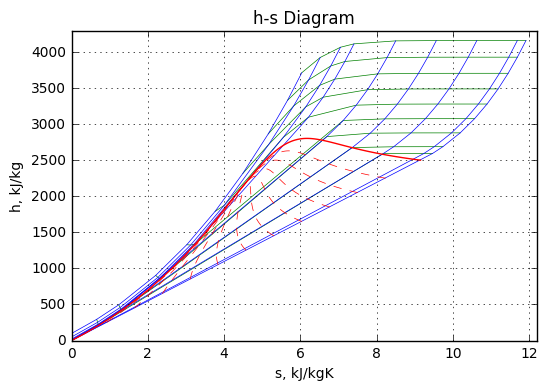

In [1]:
%matplotlib inline
"""
h-s Diagram

1 Calculating Isotherm lines isot(0.0,800)ºC
2 Calculating Isobar lines  isop(611.657e-6, 100)Mpa
3 Calculating saturation lines x=0,x=1
4 Calculating isoquality lines x(0.1,0.9)
"""
from  seuif97 import pt2h,pt2s,tx2s,tx2h
import numpy as np
import matplotlib.pyplot as plt

xAxis = "s"
yAxis = "h"
title = { "h": "h, kJ/kg", "s": "s, kJ/kgK"}

plt.title("%s-%s Diagram" % (yAxis, xAxis))
plt.xlabel(title[xAxis])
plt.ylabel(title[yAxis])
plt.xlim(0, 12.2)
plt.ylim(0, 4300)
plt.grid()

Pt=611.657e-6

isot = np.array([0, 50, 100, 200, 300, 400, 500, 600, 700, 800])
isop = np.array([Pt,0.001, 0.01, 0.1, 1, 10, 20, 50, 100])
# Isotherm lines in ºC
for t in isot:
    h = np.array([pt2h(p,t) for p in isop])
    s = np.array([pt2s(p,t) for p in isop])
    plt.plot(s,h,'g',lw=0.5)

# Isobar lines in Mpa
for p in isop:
     h = np.array([pt2h(p,t) for t in isot])
     s = np.array([pt2s(p,t) for t in isot])
     plt.plot(s,h,'b',lw=0.5)

tc=647.096-273.15
T = np.linspace(0.1,tc,100)  
# saturation lines
for x in np.array([0,1.0]):
    h = np.array([tx2h(t,x) for t in T])
    s = np.array([tx2s(t,x) for t in T])
    plt.plot(s,h,'r',lw=1.0)

# Isoquality lines
isox=np.linspace(0.1,0.9,11)
for x in isox:
    h = np.array([tx2h(t,x) for t in T])
    s = np.array([tx2s(t,x) for t in T])
    plt.plot(s,h,'r--',lw=0.5)

plt.show()